# Portfolio Analysis

### Does the historical perfomance of a company predict its future performance? 
For the project, you will give a hypothesis to this question. You will implement and test a simple investment strategy: buying the best peforming stocks. <br> This strategy is an example of *momentum investing*. This means you believe the stocks will continue to perform well based on historical data and trends. You can learn more about this strategy <a href="https://www.investopedia.com/terms/m/momentum_investing.asp">here</a>. <br> To compare this strategy you will test it against another strategy: buying the worst perfoming stocks. For a given dataset you will find which are the best and worst stocks and you will also test their performance in the "future".

**But before we go into the strategies, let's take a look at the data we have available.**

For this project we have available historical stock returns from beggining of 2012 until the end of 2021 for 419 different companies that are part of the [Standard and Poor's 500 list](https://en.wikipedia.org/wiki/S%26P_500). The symbol used in trading for this list is `SPX`.

Your first task is to create a function that loads our dataset as a pandas DataFrame. Data can be found in the file  named `spx_price_data_clean.pk`.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import spx_data as spx
import yfinance as yf
import price_analysis as px
# Add any necessary imports here

# uses function get_cached_clean_price_data() to load our dataset as a DataFrame(pandas)
def load_spx_data() -> pd.DataFrame:
    px_clean = spx.get_cached_clean_price_data()
    return px_clean

In [2]:
spx_data = load_spx_data()
spx_data

,date,ticker,adj_close,industry,beta,marketcap,year
0,2012-01-03,UHS,36.024746,Medical Care Facilities,1.099107,9.294312e+09,2012
1,2012-01-04,UHS,35.356033,Medical Care Facilities,1.099107,9.294312e+09,2012
2,2012-01-05,UHS,36.359097,Medical Care Facilities,1.099107,9.294312e+09,2012
3,2012-01-06,UHS,37.448154,Medical Care Facilities,1.099107,9.294312e+09,2012
4,2012-01-09,UHS,37.295311,Medical Care Facilities,1.099107,9.294312e+09,2012
...,...,...,...,...,...,...,...
1054618,2021-12-27,AES,23.501158,Utilities—Diversified,0.997731,1.430556e+10,2021
1054619,2021-12-28,AES,23.570658,Utilities—Diversified,0.997731,1.430556e+10,2021
1054620,2021-12-29,AES,23.610374,Utilities—Diversified,0.997731,1.430556e+10,2021
1054621,2021-12-30,AES,23.997591,Utilities—Diversified,0.997731,1.430556e+10,2021


The dataset contains the daily stock prices in column `adj_close` and other metadata about the stock or price. To do meaningful analysis on the stocks, you will might need to enrich the dataset with additional important stock data. 

You will start by creating a function that given the dataset, a start year and an end year (both inclusive), it returns a copy of the dataset but with an additional column that contains the daily returns per stock (ticker). Daily return is defined as the percentage change between any two consecutive days' prices. 

For example, the adjusted close price (end of day price) of $GOOG$ (Google) was $519.4$ on 2014-10-20 and $525.1$ on 2014-10-21. Thereore, the daily return for date 2014-10-21 for Google's stock is calculated as: $\frac{(525.1 - 519.4)}{519.4} = 0.011 = 1.1\%$

In [3]:
# Add any necessary imports here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import spx_data as spx
import yfinance as yf
import price_analysis as px

# uses function get_ticker_total_return() to add daily_return and total_return columns to dataframe
def add_daily_returns(dataset: pd.DataFrame, start_year: int, end_year: int) -> pd.DataFrame:
    px_ticker = px.get_ticker_total_return(spx_data, 2012, 2021)
    return px_ticker

In [4]:
spx_data_with_daily_returns = add_daily_returns(spx_data, 2012, 2021)
spx_data_with_daily_returns

,date,ticker,adj_close,industry,beta,marketcap,year,daily_return,total_return
0,2012-01-03,UHS,36.024746,Medical Care Facilities,1.099107,9.294312e+09,2012,NaN,NaN
1,2012-01-04,UHS,35.356033,Medical Care Facilities,1.099107,9.294312e+09,2012,-0.018563,-0.018563
2,2012-01-05,UHS,36.359097,Medical Care Facilities,1.099107,9.294312e+09,2012,0.028370,0.009281
3,2012-01-06,UHS,37.448154,Medical Care Facilities,1.099107,9.294312e+09,2012,0.029953,0.039512
4,2012-01-09,UHS,37.295311,Medical Care Facilities,1.099107,9.294312e+09,2012,-0.004081,0.035269
...,...,...,...,...,...,...,...,...,...
1054618,2021-12-27,AES,23.501158,Utilities—Diversified,0.997731,1.430556e+10,2021,0.005096,1.606708
1054619,2021-12-28,AES,23.570658,Utilities—Diversified,0.997731,1.430556e+10,2021,0.002957,1.614417
1054620,2021-12-29,AES,23.610374,Utilities—Diversified,0.997731,1.430556e+10,2021,0.001685,1.618822
1054621,2021-12-30,AES,23.997591,Utilities—Diversified,0.997731,1.430556e+10,2021,0.016400,1.661771


Now let's take a look at the daily returns. 

Pick your favorite stock (Google - GOOG, Tesla - TSLA, Apple - AAPL etc.) and plot a graph of the daily return versus date for that stock for all of its historical data available in the dataset.

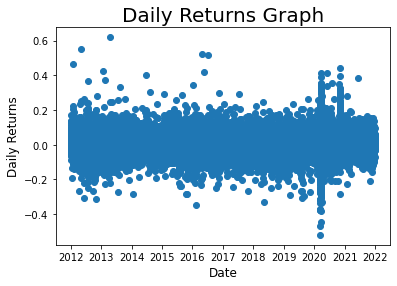

In [12]:
# Add any necessary imports here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import spx_data as spx
import yfinance as yf
import price_analysis as px

# Plots Scatterplot of daily returns vs. date for Google(2012-2021) using updated DataFrame
#still doesn't only ploy GOOG, we have to use loc or iloc(I think) but i'm still researching
plt.scatter(spx_data_with_daily_returns["date"],spx_data_with_daily_returns["daily_return"])
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Daily Returns", fontsize = 12)
plt.title("Daily Returns Graph", fontsize = 20)
plt.show()

In a few words, what can you tell about the daily returns based on the graph you plotted? 

In [ ]:
# TODO 
# Write down your observations about the graph above

#
#
#

Now implement a function that given a dataset that has the daily returns, it returns a copy of the dataset with a new column that contains the total returns per stock per date in the timeframe. The total return for a given date is equal to the percentage change between the price at the start of the period and price on that date.

In [ ]:
# Add any necessary imports here


def add_total_returns(dataset: pd.DataFrame, start_year: int, end_year: int) -> pd.DataFrame:
    
    pass  # delete this line before implementing the function
    # TODO

In [ ]:
spx_data_with_total_returns = add_total_returns(spx_data_with_daily_returns, 2012, 2021)

Similarly, for the same stock you picked, plot a graph that shows how total return changes over time for all of its historical data available in the dataset and comment with your observations.

In [ ]:
# Add any necessary imports here


# TODO
# Write code that plots the graph of *total* returns versus date for your stock choice


In [ ]:
# TODO 
# Write down your observations about the graph above

#
#
#

Now that you are more familiar with our dataset and know how to add necessary stock returns to it, let's dive into the investment strategy.

For this project you will implement two very similar strategies, where we will create an equally weighted portfolio by:

1. **Picking the top 10 performing stocks over a time period**
2. **Picking the bottom 10 performing stocks over a time period**

To be able to test the performace of your investment strategy we will "split" the dataset in two periods. The first period will be between start of 2012 and end of 2015. Data from this time period will be used to pick top and bottom performing stocks. The rest of the dataset, between start of 2016 and end of 2021, will be used to test the performace of the picked stocks.

You will start by implementing a function that given the dataset, a start year, and an end year, returns a list with top 10 performing stocks (try to make the function generic so that it works for any number of stocks and for either best or worst performing stocks). Top performing stocks for any period of time are the ones which the highest total return at the end of that period.

In [ ]:
from typing import List
# Add any necessary imports here

def top_performing_stocks(dataset: pd.DataFrame, start_year:int, end_year:int, number_stocks:int = 10) -> List[str]:
    pass  # delete this line before implementing the function
    # TODO

In [ ]:
# Run code below to test your function

error_message = (
    "Your function did not return the correct set of top "
    "10 stock performers from start of year {start_year} "
    "to the end of year {end_year}. \n"
    "Expected: {expected}\n"
    "Your function returned: {result}\n"
)
success_message = "Well Done! All tests passed!"

test_cases = [
    (2012, 2012, {'REGN', 'PHM', 'AAL', 'WHR', 'EXPE', 'EQIX', 'BAC', 'LEN', 'STX', 'MPC'}),
    (2013, 2013, {'MU', 'LYV', 'BBY', 'TMUS', 'TSLA', 'BSX', 'INCY', 'NFLX', 'HII', 'FLT'}),
    (2014, 2016, {'NVDA', 'SWKS', 'LUV', 'ULTA', 'AVGO', 'AMD', 'ABMD', 'TTWO', 'EW', 'EA'}),
    
]

for start_year, end_year, expected_result in test_cases:
    result = set(top_performing_stocks(spx_data, start_year, end_year))

    assert  result == expected_result, error_message.format(
        start_year=start_year, end_year=end_year, expected=expected_result, result=result
    )

print(success_message)

What are top 10 performing stocks for the period between 2012 and 2015?

In [ ]:
# TODO - Get top stocks and print them here
top_stocks = top_performing_stocks(...)


Similarly make a function that returns a list with the worst performing stocks. If needed, feel free to modify the function `top_performing_stocks` to support this functionality. 

What are the worst 10 performing stocks for the period between 2012 and 2015?

In [ ]:
# TODO - Answer here

#
#

Now that you are able to get lists of best and worst performing stocks, it's time to test how each of these lists would perform in the "future". 

Implement the function below that given the dataset, a start year, an end year, and a list of stocks, it returns a pandas dataset with the total return for those stocks combined for every day in the time period between those years. <br>
The list of stocks represents our portfolio. For this part of the project we will assume that each stock in the portfolio has the same weight. A stock's weight is the ratio between the net value of the stock and the net value of the portfolio. In a porfolio with $n$ stocks, the weight of each stock would be $\frac{1}{n}$.

Here is an example you can go though to help clarify how to compute the returns of an equally weighted portfolio: <br>
Suppose you have a portfolio worth $\$100$ with 2 equally weighted stocks ($\$50$ each).
- How much would the portfolio be worth after a month if the total return for each of the 2 stocks is 5%? What would the total return for the portfolio be in this case?
- How much would the porfolio be worth after a month if the total return for the first stock is 10% and for the second stock is 6%? What would the total return for the porfolio be in this case?
- What about the case when the first stock's total return is 4% and second stock's total return is -4%?

In [ ]:
# Add any necessary imports here


def get_portfolio_returns(dataset: pd.DataFrame, start_year: int, end_year: int, tickers: List[str]) -> pd.DataFrame:
    pass  # delete this line before implementing the function
    # TODO

Now use the function you just implemented to get the total returns between 2016 and 2021 for the porfolio with top 10 perfoming stocks of the period between 2012 and 2015. 

Plot the total returns of the portfolio versus date.

In [ ]:
# TODO
# Write code that plots the graph of total returns versus date for the portfolio with *top* stocks

Now repeat the step above, but for the porfolio with the worst perfoming stocks of the period between 2012 and 2015.

In [ ]:
# TODO
# Write code that plots the graph of total returns versus date for the portfolio with *worst* stocks

### Conclusions

What can you tell about the investment strategy based on the results you got? Is buying the top performing stocks a successful strategy? Is it the best strategy? How does it compare to the strategy of buying the worst performing stocks? 

In [ ]:
# TODO - Answer here

## What's your investment strategy? 
 
Come up with an investment strategy different from the ones above and implement it below. You would need to justify your porfolio choice and test it using data different from the one used to build the portfolio.
Feel free to use the dataset that's available or the code in `spx_data.py` to load a different dataset. 

<br>**<a href="https://www.investopedia.com/investing/investing-strategies/">Here</a> are some basic investment strategies to get you started!**

In [ ]:
pip install pyarrow

In [ ]:
pip install windows-curses

In [ ]:
conda install -c conda-forge pyarrow Using Pip

In [ ]:
conda upgrade --all

In [ ]:
pip install psycopg2